In [65]:
# import libraries
import numpy as np
import pandas as pd
import random
import csv
import scipy.stats as stats
import seaborn as sns
from collections import Counter
from collections import defaultdict
import math
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from random import randint

import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess
from pandas import Series, DataFrame
from patsy import dmatrices
from sklearn import datasets, svm

# initialize the plotting sizes
# set size
plt.rc('figure', figsize=(15, 8))
# subplots size
fizsize_with_subplots = (15, 8)
# histogram size
bin_size = 10

In [66]:
dates = pd.read_csv('data/dates.csv',header=None)
queries = pd.read_csv('data/queries.csv',header=None)
X = pd.read_csv('data/X.csv',header=None)
y = pd.read_csv('data/y.csv',header=None)

dates['Date'] = pd.to_datetime(dates[0])
y.set_index(dates['Date'],inplace=True)
X.set_index(dates['Date'],inplace=True)

In [67]:
y.head()

,0
Date,
2005-08-24,3.12857
2005-08-25,3.23000
2005-08-26,3.23714
2005-08-27,3.24429
2005-08-28,3.25143


In [80]:
# data preprocessing and train-test split
# this data is well formed with no missing value and other symbols or labels that are non numerical.
# splitting the data into train and test

# Here we want the first 500 queries
X = X.iloc[:, 0: 500]

# first with the last year as test
# for convinience, pick the two validation set starting from 1/3 and 2/3 of the training set,
# 10% of training set as validation, here use 400 data points, two 200 periods.
test_size =365
length = X.shape[0]
l =(X.shape[0]-test_size)//3

train1_X = pd.concat([X[0:l],X[l+200:2*l],X[2*l+200:length-test_size]])
val1_X = pd.concat([X[l:l+200],X[2*l:2*l+200]])
train1_y = pd.concat([y[0:l],y[l+200:2*l],y[2*l+200:length-test_size]])
val1_y = pd.concat([y[l:l+200],y[2*l:2*l+200]])
test1_X = X[length-test_size:]
test1_y = y[length-test_size:]

#without validation set
train1_X2 = X[0:length-test_size]
train1_y2 = y[0:length-test_size]


# second with the last 2 year as test
test_size2 =365*2
l2 =(X.shape[0]-test_size2)//3

train2_X = pd.concat([X[0:l2],X[l2+180:2*l2],X[2*l2+180:length-test_size2]])
val2_X = pd.concat([X[l2:l2+180],X[2*l2:2*l2+180]])
train2_y = pd.concat([y[0:l2],y[l2+180:2*l2],y[2*l2+180:length-test_size2]])
val2_y = pd.concat([y[l2:l2+180],y[2*l2:2*l2+180]])
test2_X = X[length-test_size2:length-test_size]
test2_y = y[length-test_size2:length-test_size]

#without validation set
train2_X2 = X[0:length-test_size2]
train2_y2 = y[0:length-test_size2]
y2 =y[0:4018]

print('X shape: ',X.shape,'  y shape: ',y.shape)
print('train1 X:',train1_X.shape,' train1 y:',train1_y.shape,' Test1 X shape:',test1_X.shape, ' Test1 y shape:',test1_y.shape)
print('validation1 X:',val1_X.shape,' validation1 y:',val1_y.shape)
print('train2 X:',train2_X.shape,' train2 y:',train2_y.shape,' Test2 X:',test2_X.shape,' Test2 y:',test2_y.shape)
print('validation2 X:',val2_X.shape,' validation2 y:',val2_y.shape)

X shape:  (4383, 500)   y shape:  (4383, 1)
train1 X: (3618, 500)  train1 y: (3618, 1)  Test1 X shape: (365, 500)  Test1 y shape: (365, 1)
validation1 X: (400, 500)  validation1 y: (400, 1)
train2 X: (3293, 500)  train2 y: (3293, 1)  Test2 X: (365, 500)  Test2 y: (365, 1)
validation2 X: (360, 500)  validation2 y: (360, 1)


In [69]:
train2_y2.tail()

,0
Date,
2015-08-20,2.32000
2015-08-21,2.22857
2015-08-22,2.13714
2015-08-23,2.04571
2015-08-24,1.95429


In [70]:
test2_y.tail()

,0
Date,
2016-08-19,1.45857
2016-08-20,1.39714
2016-08-21,1.33571
2016-08-22,1.27429
2016-08-23,1.21286


In [71]:
train2_y2.shape

(3653, 1)

In [72]:
train2_y2[0][0]

3.12857

In [73]:
3654%365

4

In [74]:
from sklearn.metrics import mean_absolute_error
# mae = mean_absolute_error(y_actual, y_pred)

from sklearn.metrics import mean_squared_error
from math import sqrt
# rmse = sqrt(mean_squared_error(y_actual, y_pred))

# np.correcoef returns Pearson product-moment correlation coefficients
def pearson_r(x,y):   
    corr_mat = np.corrcoef(x,y)
    return corr_mat[0,1]
# r = pearson_r(y_actual,y_pred)

In [75]:
train = train2_y2.copy()
test = test2_y.copy()

predict = list()
count=0

for t in range(len(test)):
    res = (t+4)%365  ## the 3654 mod 365 equals 4
    avg=0.0
    num=0.0
    for x in range(len(train)):     
        if (x%365==res):
            num = num+1
            avg = avg+ train[0][x]
    avg= avg/num
    predict.append(avg)
    
    count=count+1
    print(count)

mae1 = mean_absolute_error(test, predict)
rmse1 = sqrt(mean_squared_error(test, predict))

print(mae1,rmse1)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [76]:
corr_y = test.copy()
corr_y['y_act'] = test
corr_y['y_pred']= predict
corr = np.corrcoef(corr_y['y_act'],corr_y['y_pred'])[0,1]
corr

0.3695747674225807

In [77]:
predict[1]

2.6407130000000003

In [78]:
yearly_ave= list()
for i in range(4018):
    key = i%365
    yearly_ave.append(predict[key])


In [79]:
len(yearly_ave)

4018

In [81]:
y2['ave_yearly'] = yearly_ave

/home/yiyangsu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [82]:
y2['ave_yearly'].to_csv('average_yearly_flu_rate_4018.csv')

In [83]:
y2['ave_yearly']

Date
2005-08-24    2.687429
2005-08-25    2.640713
2005-08-26    2.611142
2005-08-27    2.627286
2005-08-28    2.682714
2005-08-29    2.733428
2005-08-30    2.800857
2005-08-31    2.874001
2005-01-09    3.000286
2005-02-09    3.109858
2005-03-09    3.217858
2005-04-09    3.280856
2005-05-09    3.345568
2005-06-09    3.403570
2005-07-09    3.478571
2005-08-09    3.552433
2005-09-09    3.626713
2005-10-09    3.695574
2005-11-09    3.762711
2005-12-09    3.852573
2005-09-13    3.937854
2005-09-14    4.002001
2005-09-15    4.111717
2005-09-16    4.243709
2005-09-17    4.386998
2005-09-18    4.591716
2005-09-19    4.817289
2005-09-20    5.042425
2005-09-21    5.263858
2005-09-22    5.468429
                ...   
2016-07-25    5.771145
2016-07-26    5.567145
2016-07-27    5.387719
2016-07-28    5.215568
2016-07-29    5.051568
2016-07-30    4.890998
2016-07-31    4.750713
2016-01-08    4.615000
2016-02-08    4.478714
2016-03-08    4.346142
2016-04-08    4.210142
2016-05-08    4.061715
2016-0

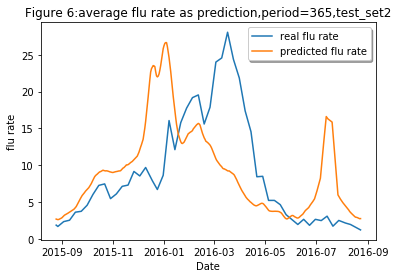

In [39]:
# visualize
date = pd.date_range('20050824',periods=4018)
import matplotlib.dates as mdates
df = y.copy()
df['y'] = y.values
fig, ax = plt.subplots()
ax.plot(date[3653:4018],df.y[3653:4018],label='real flu rate')
ax.plot(date[3653:4018],predict,label='predicted flu rate')
# Now add the legend with some customizations.
legend = ax.legend(loc='upper right', shadow=True)

plt.title("Figure 6:average flu rate as prediction,period=365,test_set2")
plt.ylabel('flu rate')
plt.xlabel('Date')

plt.show()

In [40]:
3654%530

474

In [41]:
# period = 530
train = train2_y2.copy()
test = test2_y.copy()

predict2 = list()
count=0

for t in range(len(test)):
    res = (t+474)%530  ## the 3654th mod 530 equals 474
    avg=0.0
    num=0.0
    for x in range(len(train)):     
        if (x%530==res):
            num = num+1
            avg = avg+ train[0][x]
    avg= avg/num
    predict2.append(avg)
    
    count=count+1
    print(count)

mae2 = mean_absolute_error(test, predict2)
rmse2 = sqrt(mean_squared_error(test, predict2))

corr_y = test.copy()
corr_y['y_act'] = test
corr_y['y_pred']= predict2
corr2 = np.corrcoef(corr_y['y_act'],corr_y['y_pred'])[0,1]

print(mae2,rmse2,corr2)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


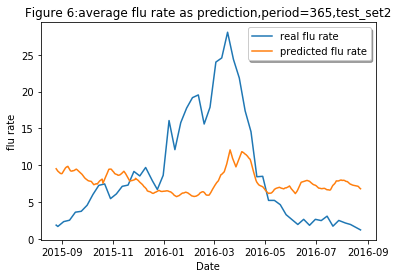

In [42]:
# visualize
date = pd.date_range('20050824',periods=4018)
import matplotlib.dates as mdates
df = y.copy()
df['y'] = y.values
fig, ax = plt.subplots()
ax.plot(date[3653:4018],df.y[3653:4018],label='real flu rate')
ax.plot(date[3653:4018],predict2,label='predicted flu rate')
# Now add the legend with some customizations.
legend = ax.legend(loc='upper right', shadow=True)

plt.title("Figure 6:average flu rate as prediction,period=365,test_set2")
plt.ylabel('flu rate')
plt.xlabel('Date')

plt.show()

In [43]:
3654%733

722

In [84]:
# period = 733
train = train2_y2.copy()
test = test2_y.copy()

predict3 = list()
count=0

for t in range(len(test)):
    res = (t+722)%733  ## the 4019th mod 733 equals 722
    avg=0.0
    num=0.0
    for x in range(len(train)):     
        if (x%733==res):
            num = num+1
            avg = avg+ train[0][x]
    avg= avg/num
    predict3.append(avg)
    
    count=count+1
    print(count)

mae3 = mean_absolute_error(test, predict3)
rmse3 = sqrt(mean_squared_error(test, predict3))

corr_y = test.copy()
corr_y['y_act'] = test
corr_y['y_pred']= predict3
corr3 = np.corrcoef(corr_y['y_act'],corr_y['y_pred'])[0,1]

print(mae3,rmse3,corr3)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


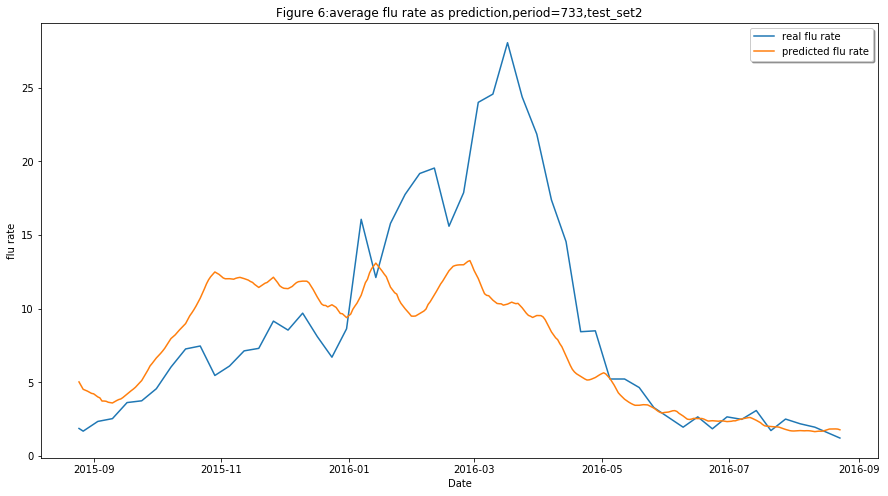

In [85]:
# visualize
date = pd.date_range('20050824',periods=4018)
import matplotlib.dates as mdates
df = y.copy()
df['y'] = y.values
fig, ax = plt.subplots()
ax.plot(date[3653:4018],df.y[3653:4018],label='real flu rate')
ax.plot(date[3653:4018],predict3,label='predicted flu rate')
# Now add the legend with some customizations.
legend = ax.legend(loc='upper right', shadow=True)

plt.title("Figure 6:average flu rate as prediction,period=733,test_set2")
plt.ylabel('flu rate')
plt.xlabel('Date')

plt.show()

In [86]:
Bi_year=list()
for t in range(733):
    res = (t+722)%733  ## the 4019th mod 733 equals 722
    avg=0.0
    num=0.0
    for x in range(len(train)):     
        if (x%733==res):
            num = num+1
            avg = avg+ train[0][x]
    avg= avg/num
    Bi_year.append(avg)


In [87]:
len(Bi_year)
bi_year= pd.DataFrame(Bi_year)

In [88]:
bi_yearly_ave= list()
for i in range(4018):
    key = i%733
    bi_yearly_ave.append(Bi_year[key])
y2['ave_bi_yearly'] = bi_yearly_ave
y2['ave_bi_yearly'].to_csv('average_bi_yearly_733_flu_rate_4018.csv')

/home/yiyangsu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [64]:
train2_y2['ave_bi_yearly'].shape

(3653,)